In [3]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import pandas as pd
import statsmodels.api as sm
import matplotlib
#warning.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

### Houston

In [5]:
houston = pd.read_csv('Houston.csv')
houston.head(2)

,locationId,location,city,country,utc,local,parameter,value,unit,latitude,longitude
0,162,Houston Deer Park C3,Houston-Sugar Land-Baytown,US,2021-10-06T11:00:00+00:00,2021-10-06T06:00:00-05:00,o3,0.001,ppm,29.670025,-95.128508
1,162,Houston Deer Park C3,Houston-Sugar Land-Baytown,US,2021-10-06T10:00:00+00:00,2021-10-06T05:00:00-05:00,o3,0.003,ppm,29.670025,-95.128508


In [6]:
houston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56854 entries, 0 to 56853
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   locationId  56854 non-null  int64  
 1   location    56854 non-null  object 
 2   city        56854 non-null  object 
 3   country     56854 non-null  object 
 4   utc         56854 non-null  object 
 5   local       56854 non-null  object 
 6   parameter   56854 non-null  object 
 7   value       56854 non-null  float64
 8   unit        56854 non-null  object 
 9   latitude    56854 non-null  float64
 10  longitude   56854 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.8+ MB


In [7]:
houston.shape

(56854, 11)

In [8]:
houston['parameter'].value_counts()

o3      33762
pm25    23092
Name: parameter, dtype: int64

In [9]:
houston['unit'].value_counts()

ppm      33762
µg/m³    23092
Name: unit, dtype: int64

In [10]:
houston = houston.loc[(houston['parameter'] == 'pm25') & (houston['unit'] == 'µg/m³')]

In [11]:
houston['utc'] = pd.to_datetime(houston['utc'])

In [12]:
houston = houston.sort_values('utc')
houston.head(2)

,locationId,location,city,country,utc,local,parameter,value,unit,latitude,longitude
56853,162,Houston Deer Park C3,Houston-Sugar Land-Baytown,US,2016-06-15 04:00:00+00:00,2016-06-14T23:00:00-05:00,pm25,15.7,µg/m³,29.670025,-95.128508
56850,162,Houston Deer Park C3,Houston-Sugar Land-Baytown,US,2016-06-15 05:00:00+00:00,2016-06-15T00:00:00-05:00,pm25,15.1,µg/m³,29.670025,-95.128508


In [13]:
houston['year'] = houston['utc'].dt.year

In [14]:
houston.head(2)

,locationId,location,city,country,utc,local,parameter,value,unit,latitude,longitude,year
56853,162,Houston Deer Park C3,Houston-Sugar Land-Baytown,US,2016-06-15 04:00:00+00:00,2016-06-14T23:00:00-05:00,pm25,15.7,µg/m³,29.670025,-95.128508,2016
56850,162,Houston Deer Park C3,Houston-Sugar Land-Baytown,US,2016-06-15 05:00:00+00:00,2016-06-15T00:00:00-05:00,pm25,15.1,µg/m³,29.670025,-95.128508,2016


In [15]:
houston['year'].value_counts()

2019    7700
2018    5561
2017    5316
2016    4515
Name: year, dtype: int64

In [16]:
houston.head(2)

,locationId,location,city,country,utc,local,parameter,value,unit,latitude,longitude,year
56853,162,Houston Deer Park C3,Houston-Sugar Land-Baytown,US,2016-06-15 04:00:00+00:00,2016-06-14T23:00:00-05:00,pm25,15.7,µg/m³,29.670025,-95.128508,2016
56850,162,Houston Deer Park C3,Houston-Sugar Land-Baytown,US,2016-06-15 05:00:00+00:00,2016-06-15T00:00:00-05:00,pm25,15.1,µg/m³,29.670025,-95.128508,2016


In [17]:
houston_pm25 = houston.groupby(['year', 'city', 'parameter'], as_index=False).agg({'value':'mean'})
houston_pm25

,year,city,parameter,value
0,2016,Houston-Sugar Land-Baytown,pm25,8.191340
1,2017,Houston-Sugar Land-Baytown,pm25,7.745053
2,2018,Houston-Sugar Land-Baytown,pm25,8.357957
3,2019,Houston-Sugar Land-Baytown,pm25,7.292325


<AxesSubplot:xlabel='year', ylabel='value'>

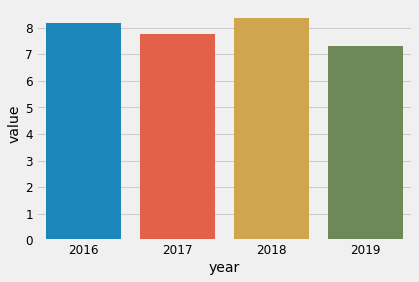

In [18]:
sns.barplot(data=houston_pm25, x='year', y='value')

Houston se mantiene por debajo en los valores de contaminación establecidos por la OMS para pm2.5 anualmente.

### Santiago

In [19]:
santiago = pd.read_csv('Santiago.csv')

In [20]:
santiago.head(2)

,locationId,location,city,country,utc,local,parameter,value,unit,latitude,longitude
0,25,Parque O'Higgins,Santiago,CL,2021-08-20T21:00:00+00:00,2021-08-20T20:00:00-01:00,pm25,30,µg/m³,-33.464142,-70.660797
1,25,Parque O'Higgins,Santiago,CL,2021-08-20T21:00:00+00:00,2021-08-20T20:00:00-01:00,pm10,100,µg/m³,-33.464142,-70.660797


In [21]:
santiago.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20866 entries, 0 to 20865
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   locationId  20866 non-null  int64  
 1   location    20866 non-null  object 
 2   city        20866 non-null  object 
 3   country     20866 non-null  object 
 4   utc         20866 non-null  object 
 5   local       20866 non-null  object 
 6   parameter   20866 non-null  object 
 7   value       20866 non-null  int64  
 8   unit        20866 non-null  object 
 9   latitude    20866 non-null  float64
 10  longitude   20866 non-null  float64
dtypes: float64(2), int64(2), object(7)
memory usage: 1.8+ MB


In [22]:
santiago.shape

(20866, 11)

In [23]:
santiago['parameter'].value_counts()

pm25    10434
pm10    10432
Name: parameter, dtype: int64

In [24]:
santiago['unit'].value_counts()

µg/m³    20866
Name: unit, dtype: int64

In [25]:
santiago = santiago.loc[santiago['parameter'] == 'pm25']

In [26]:
santiago['utc'] = pd.to_datetime(santiago['utc'])

In [27]:
santiago = santiago.sort_values('utc')
santiago.head(2)

,locationId,location,city,country,utc,local,parameter,value,unit,latitude,longitude
20865,25,Parque O'Higgins,Santiago,CL,2020-01-01 04:00:00+00:00,2020-01-01T03:00:00-01:00,pm25,10,µg/m³,-33.464142,-70.660797
20862,25,Parque O'Higgins,Santiago,CL,2020-01-01 05:00:00+00:00,2020-01-01T04:00:00-01:00,pm25,24,µg/m³,-33.464142,-70.660797


In [28]:
santiago['year'] = santiago['utc'].dt.year

In [29]:
santiago.head(2)

,locationId,location,city,country,utc,local,parameter,value,unit,latitude,longitude,year
20865,25,Parque O'Higgins,Santiago,CL,2020-01-01 04:00:00+00:00,2020-01-01T03:00:00-01:00,pm25,10,µg/m³,-33.464142,-70.660797,2020
20862,25,Parque O'Higgins,Santiago,CL,2020-01-01 05:00:00+00:00,2020-01-01T04:00:00-01:00,pm25,24,µg/m³,-33.464142,-70.660797,2020


In [30]:
santiago['year'].value_counts()

2020    7546
2021    2888
Name: year, dtype: int64

In [31]:
santiago_pm25 = santiago.groupby(['year', 'city', 'parameter'], as_index=False).agg({'value':'mean'})
santiago_pm25

,year,city,parameter,value
0,2020,Santiago,pm25,20.293798
1,2021,Santiago,pm25,21.945637


<AxesSubplot:xlabel='year', ylabel='value'>

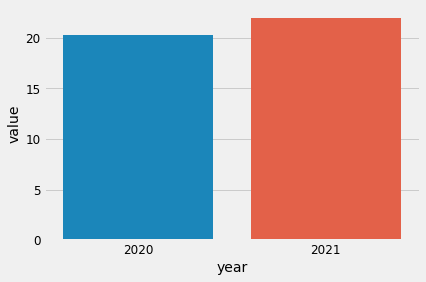

In [32]:
sns.barplot(data=santiago_pm25, x='year', y='value')

### Mexico

In [33]:
mexico = pd.read_csv('df_new_cam.csv')

In [34]:
mexico.head(2)

,locationId,location,city,country,utc,local,parameter,value,unit,latitude,longitude
0,1739,Camarones,DISTRITO FEDERAL,MX,2021-10-06T14:00:00+00:00,2021-10-06T09:00:00-05:00,pm25,5,µg/m³,19.4684,-99.1697
1,1739,Camarones,DISTRITO FEDERAL,MX,2021-10-06T14:00:00+00:00,2021-10-06T09:00:00-05:00,pm10,17,µg/m³,19.4684,-99.1697


In [35]:
mexico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14105 entries, 0 to 14104
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   locationId  14105 non-null  int64  
 1   location    14105 non-null  object 
 2   city        14105 non-null  object 
 3   country     14105 non-null  object 
 4   utc         14105 non-null  object 
 5   local       14105 non-null  object 
 6   parameter   14105 non-null  object 
 7   value       14105 non-null  int64  
 8   unit        14105 non-null  object 
 9   latitude    14105 non-null  float64
 10  longitude   14105 non-null  float64
dtypes: float64(2), int64(2), object(7)
memory usage: 1.2+ MB


In [36]:
mexico.shape

(14105, 11)

In [37]:
mexico['parameter'].value_counts()

pm10    7086
pm25    7019
Name: parameter, dtype: int64

In [38]:
mexico['unit'].value_counts()

µg/m³    14105
Name: unit, dtype: int64

In [39]:
mexico = mexico.loc[mexico['parameter'] == 'pm25']

In [40]:
mexico['utc'] = pd.to_datetime(mexico['utc'])

In [41]:
mexico = mexico.sort_values('utc')
mexico.head(2)

,locationId,location,city,country,utc,local,parameter,value,unit,latitude,longitude
14104,1739,Camarones,DISTRITO FEDERAL,MX,2019-04-09 20:00:00+00:00,2019-04-09T15:00:00-05:00,pm25,17,µg/m³,19.4684,-99.1697
14102,1739,Camarones,DISTRITO FEDERAL,MX,2019-04-09 21:00:00+00:00,2019-04-09T16:00:00-05:00,pm25,14,µg/m³,19.4684,-99.1697


In [42]:
mexico['year'] = mexico['utc'].dt.year

In [43]:
mexico.head(2)

,locationId,location,city,country,utc,local,parameter,value,unit,latitude,longitude,year
14104,1739,Camarones,DISTRITO FEDERAL,MX,2019-04-09 20:00:00+00:00,2019-04-09T15:00:00-05:00,pm25,17,µg/m³,19.4684,-99.1697,2019
14102,1739,Camarones,DISTRITO FEDERAL,MX,2019-04-09 21:00:00+00:00,2019-04-09T16:00:00-05:00,pm25,14,µg/m³,19.4684,-99.1697,2019


In [44]:
mexico['year'].value_counts()

2020    3349
2021    2359
2019    1311
Name: year, dtype: int64

In [45]:
mexico_pm25 = mexico.groupby(['year', 'city', 'parameter'], as_index=False).agg({'value':'mean'})
mexico_pm25

,year,city,parameter,value
0,2019,DISTRITO FEDERAL,pm25,26.372235
1,2020,DISTRITO FEDERAL,pm25,18.066886
2,2021,DISTRITO FEDERAL,pm25,19.555320


<AxesSubplot:xlabel='year', ylabel='value'>

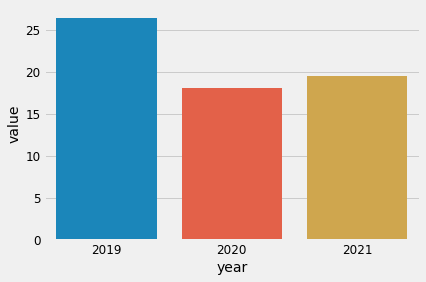

In [46]:
sns.barplot(data=mexico_pm25, x='year', y='value')

### Dehli

In [47]:
dehli = pd.read_csv('Dehli.csv')

In [48]:
dehli.head(2)

,locationId,location,city,country,utc,local,parameter,value,unit,latitude,longitude
0,5570,"Aya Nagar, Delhi - IMD",Delhi,IN,2020-12-31T04:00:00+00:00,2020-12-31T09:30:00+05:30,pm10,179.59,µg/m³,28.470691,77.109936
1,5570,"Aya Nagar, Delhi - IMD",Delhi,IN,2020-12-31T04:00:00+00:00,2020-12-31T09:30:00+05:30,pm25,115.80,µg/m³,28.470691,77.109936


In [49]:
dehli.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30500 entries, 0 to 30499
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   locationId  30500 non-null  int64  
 1   location    30500 non-null  object 
 2   city        30500 non-null  object 
 3   country     30500 non-null  object 
 4   utc         30500 non-null  object 
 5   local       30500 non-null  object 
 6   parameter   30500 non-null  object 
 7   value       30500 non-null  float64
 8   unit        30500 non-null  object 
 9   latitude    30500 non-null  float64
 10  longitude   30500 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 2.6+ MB


In [50]:
dehli.shape

(30500, 11)

In [51]:
dehli['parameter'].value_counts()

pm10    15250
pm25    15250
Name: parameter, dtype: int64

In [52]:
dehli['unit'].value_counts()

µg/m³    30500
Name: unit, dtype: int64

In [53]:
dehli = dehli.loc[dehli['parameter'] == 'pm25']

In [54]:
dehli['utc'] = pd.to_datetime(dehli['utc'])

In [55]:
dehli = dehli.sort_values('utc')
dehli.head(2)

,locationId,location,city,country,utc,local,parameter,value,unit,latitude,longitude
30498,5570,"Aya Nagar, Delhi - IMD",Delhi,IN,2020-01-01 04:00:00+00:00,2020-01-01T09:30:00+05:30,pm25,446.75,µg/m³,28.470691,77.109936
30496,5570,"Aya Nagar, Delhi - IMD",Delhi,IN,2020-01-01 04:15:00+00:00,2020-01-01T09:45:00+05:30,pm25,400.46,µg/m³,28.470691,77.109936


In [56]:
dehli['year'] = dehli['utc'].dt.year

In [57]:
dehli.head(2)

,locationId,location,city,country,utc,local,parameter,value,unit,latitude,longitude,year
30498,5570,"Aya Nagar, Delhi - IMD",Delhi,IN,2020-01-01 04:00:00+00:00,2020-01-01T09:30:00+05:30,pm25,446.75,µg/m³,28.470691,77.109936,2020
30496,5570,"Aya Nagar, Delhi - IMD",Delhi,IN,2020-01-01 04:15:00+00:00,2020-01-01T09:45:00+05:30,pm25,400.46,µg/m³,28.470691,77.109936,2020


In [58]:
dehli['year'].value_counts()

2020    15250
Name: year, dtype: int64

In [59]:
dehli_pm25 = dehli.groupby(['year', 'city', 'parameter'], as_index=False).agg({'value':'mean'})
dehli_pm25

,year,city,parameter,value
0,2020,Delhi,pm25,69.113219


**Uniendo los dataframe y evaluando en el año 2020**

In [60]:
mexico_y = mexico_pm25[mexico_pm25['year'] == 2020]

In [61]:
santiago_y = santiago_pm25[santiago_pm25['year'] == 2020]

In [62]:
pm_25_by_country = pd.concat([dehli_pm25, mexico_y, santiago_y], axis=0)

In [63]:
pm_25_by_country

,year,city,parameter,value
0,2020,Delhi,pm25,69.113219
1,2020,DISTRITO FEDERAL,pm25,18.066886
0,2020,Santiago,pm25,20.293798


<AxesSubplot:xlabel='city', ylabel='value'>

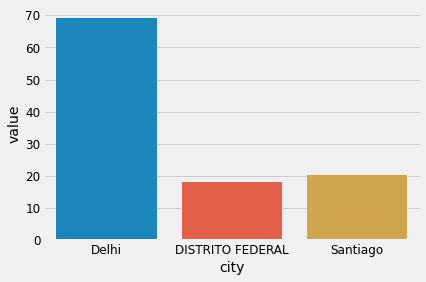

In [64]:
sns.barplot(data=pm_25_by_country, x='city', y='value')

### Historical Data Houston

In [65]:
houston_hist = pd.read_csv('houston-east, houston, texas-air-quality.csv')

In [66]:
to_rename = [column for column in houston_hist.columns]
to_rename

['date', ' pm25', ' pm10', ' o3', ' no2', ' so2', ' co']

In [67]:
to_keep = ['date', 'pm25', 'pm10', 'o3', 'no2', 'so2', 'co']

In [68]:
dict_hou = dict(zip(to_rename, to_keep))
dict_hou

{'date': 'date',
 ' pm25': 'pm25',
 ' pm10': 'pm10',
 ' o3': 'o3',
 ' no2': 'no2',
 ' so2': 'so2',
 ' co': 'co'}

In [69]:
houston_hist.rename(columns=dict_hou, inplace=True)

In [70]:
houston_hist.head(10)

,date,pm25,pm10,o3,no2,so2,co
0,2021/10/2,29,,19,10,,
1,2021/10/3,29,,,,,
2,2021/10/4,58,,,,,
3,2021/9/2,53,,19,8,,
4,2021/9/3,56,,20,10,,
5,2021/9/4,44,,25,5,,
6,2021/9/5,76,,25,3,,
7,2021/9/6,81,,37,5,,
8,2021/9/7,55,,41,13,,
9,2021/9/8,49,,51,19,,


In [71]:
houston_hist.shape

(2793, 7)

In [72]:
houston_hist.drop(columns=['pm10', 'o3', 'no2', 'so2', 'co'], inplace=True)

In [73]:
houston_hist['date'] = pd.to_datetime(houston_hist['date'])

In [74]:
houston_hist.dtypes

date    datetime64[ns]
pm25            object
dtype: object

In [75]:
houston_hist = houston_hist.sort_values('date')
houston_hist.head(2)

,date,pm25
2775,2014-01-01,
2456,2014-01-02,72


In [76]:
houston_hist.set_index('date', inplace=True)

In [77]:
houston_hist.head(2)

,pm25
date,
2014-01-01,
2014-01-02,72


In [78]:
houston_hist.dtypes

pm25    object
dtype: object

In [79]:
houston_hist['pm25'] = houston_hist['pm25'].apply(lambda x: x.strip()).replace('', np.nan)

In [80]:
houston_hist.head(2)

,pm25
date,
2014-01-01,NaN
2014-01-02,72


In [81]:
houston_hist.dropna(inplace=True)

In [82]:
houston_hist['pm25'] = houston_hist['pm25'].astype('int64')

In [83]:
houston_hist.dtypes

pm25    int64
dtype: object

In [84]:
houston_hist.head(2)

,pm25
date,
2014-01-02,72
2014-01-03,61


In [85]:
houston_hist = houston_hist.loc['2019-01-01':]

In [86]:
houston_hist_m = houston_hist['pm25'].resample('MS').mean() 

In [87]:
houston_hist_m

date
2019-01-01    37.266667
2019-02-01    35.500000
2019-03-01    42.806452
2019-04-01    35.620690
2019-05-01    37.666667
2019-06-01    41.166667
2019-07-01    38.387097
2019-08-01    37.322581
2019-09-01    33.666667
2019-10-01    33.483871
2019-11-01    44.033333
2019-12-01    40.533333
2020-01-01    36.178571
2020-02-01    32.846154
2020-03-01    39.000000
2020-04-01    41.777778
2020-05-01    32.064516
2020-06-01    42.300000
2020-07-01    46.161290
2020-08-01    42.633333
2020-09-01    40.066667
2020-10-01    40.838710
2020-11-01    39.400000
2020-12-01    36.516129
2021-01-01    41.290323
2021-02-01    42.185185
2021-03-01    40.580645
2021-04-01    42.300000
2021-05-01    39.222222
2021-06-01    38.652174
2021-07-01    42.677419
2021-08-01    41.419355
2021-09-01    47.066667
2021-10-01    35.750000
Freq: MS, Name: pm25, dtype: float64

In [105]:
houston_hist_m.shape

(34,)

In [127]:
def plot_df(df, title="", xlabel='Fecha', ylabel='AQI PM2.5', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    df.plot()
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

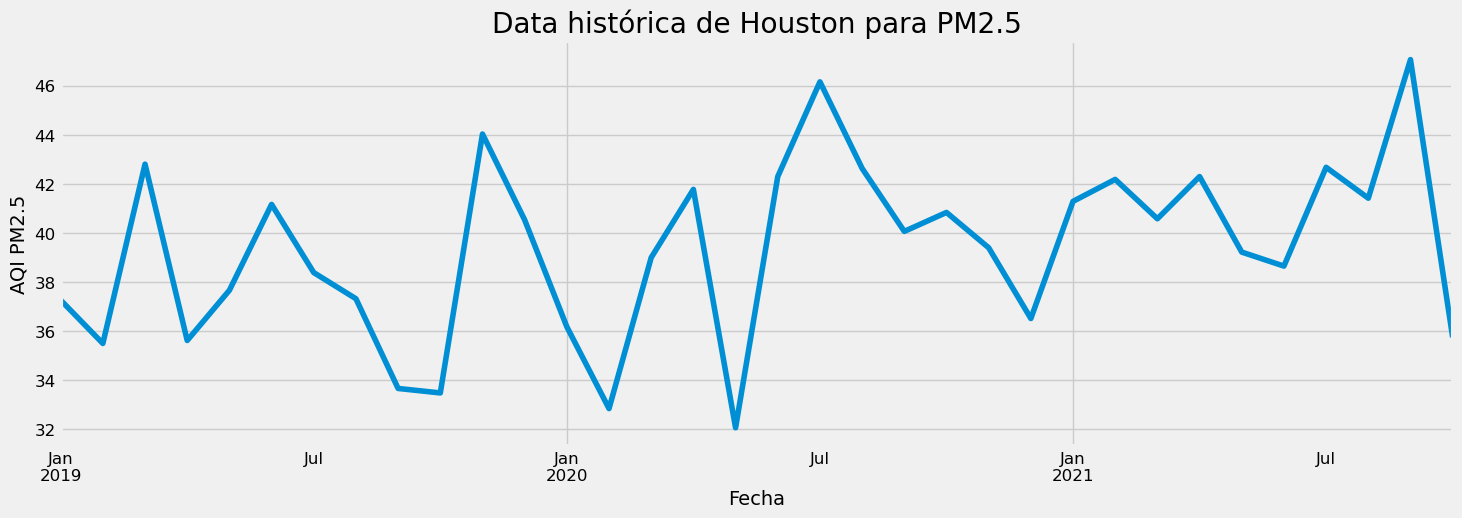

In [135]:
plot_df(houston_hist_m, title='Data histórica de Houston para PM2.5')

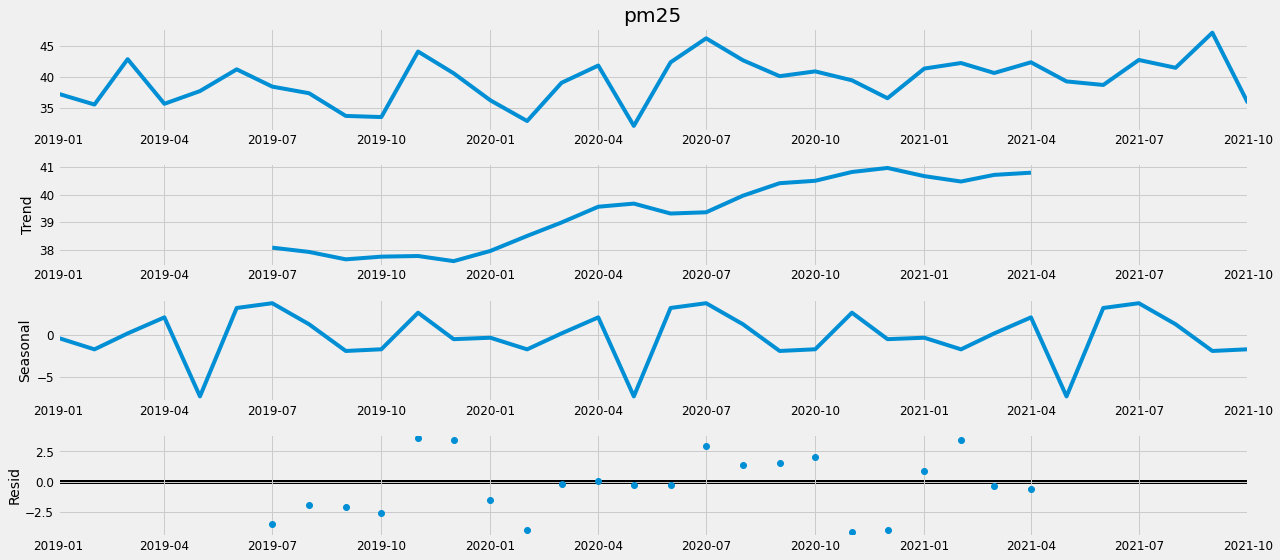

In [129]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(houston_hist_m, model='additive')
fig = decomposition.plot()

In [92]:
from statsmodels.tsa.stattools import adfuller

test_adf = adfuller(houston_hist_m)

test_adf

(-5.111417484307345,
 1.3296532273038841e-05,
 0,
 33,
 {'1%': -3.6461350877925254,
  '5%': -2.954126991123355,
  '10%': -2.6159676124885216},
 127.37254026083517)

The null Hypothesis can be rejected since have a critical value of less than -2.9 and p value of less than 0.05. Which means that the time series is stationary.

In [93]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [94]:
model_param = list()
aic = list()

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(houston_hist_m,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()
            model_param.append((param, param_seasonal))
            aic.append(results.aic)

            print('SARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

SARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:338.4468356512672
SARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:209.3150836529246
SARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:131.3770963301489


C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:57.81373063620905
SARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:137.7063151010057
SARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:131.19700829063711
SARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:63.75376018033637
SARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:59.81168434781093
SARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:291.15801779797846
SARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:178.3048189799535
SARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:127.67361910601596
SARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:51.22691513951407
SARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:139.6804564478623


C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:128.26555394434212
SARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:65.62047945087406
SARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:53.22235878005536
SARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:195.960378755709
SARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:125.36014115432536
SARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:137.44704327597987
SARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:57.27271689717968
SARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:130.7947022636453
SARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:127.32285574226593
SARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:63.1641063967816
SARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:59.2726659864597
SARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:173.75622680446983
SARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:111.3960389305205
SARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:123.51407613135305
SARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:46.32515788504918
SARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:122.19259114417576
SARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:113.29794258987907
SARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:59.48

C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:118.6121647067806
SARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:129.24395401311745
SARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:53.21681806837881
SARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:123.48205868519744
SARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:120.56080661274838
SARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:61.689423341237834
SARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:55.213706057257006
SARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:193.23375634649773
SARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:123.36336347530185
SARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:136.70636553930314
SARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:55.69118259349587
SARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:123.30905676572286
SARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:125.28201053149971
SARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:55.46592747429078
SARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:57.38306311459178
SARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:175.743472094801
SARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:113.26566270329693
SARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:

In [96]:
df_model = pd.DataFrame(zip(model_param, aic), columns=['parameters', 'aic'])
df_model.head()

,parameters,aic
0,"((0, 0, 0), (0, 0, 0, 12))",338.446836
1,"((0, 0, 0), (0, 0, 1, 12))",209.315084
2,"((0, 0, 0), (0, 1, 0, 12))",131.377096
3,"((0, 0, 0), (0, 1, 1, 12))",57.813731
4,"((0, 0, 0), (1, 0, 0, 12))",137.706315


In [97]:
df_model.min()

parameters    ((0, 0, 0), (0, 0, 0, 12))
aic                            46.325158
dtype: object

In [98]:
model = sm.tsa.statespace.SARIMAX(
    houston_hist_m,
    order=(0, 1, 1),
    seasonal_order=(0, 1, 1, 12),
    enforce_stationarity=False
)

results = model.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9981     53.937     -0.019      0.985    -106.713     104.717
ma.S.L12      -0.9698     33.693     -0.029      0.977     -67.006      65.066
sigma2        11.4569    749.028      0.015      0.988   -1456.611    1479.524


C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [99]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

ValueError: Length of endogenous variable must be larger the the number of lags used in the model and the number of observations burned in the log-likelihood calculation.

<Figure size 1152x576 with 0 Axes>

In [100]:
pred = results.get_prediction(start=pd.to_datetime('2021-01-01'))
pred_ci = pred.conf_int()
pred_ci

,lower pm25,upper pm25
date,,
2021-01-01,27.755173,47.041866
2021-02-01,27.547741,45.428697
2021-03-01,35.596914,53.116949
2021-04-01,32.888535,50.163727
2021-05-01,29.251225,46.349361
2021-06-01,36.365206,53.329327
2021-07-01,36.271891,53.131037
2021-08-01,33.814937,50.589625
2021-09-01,30.667456,47.372723


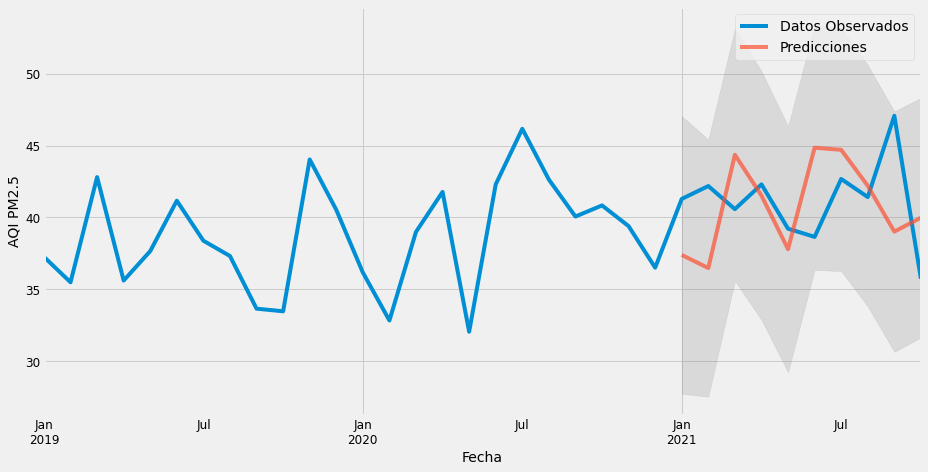

In [126]:


ax = houston_hist_m['2019':].plot(label='Datos Observados')

pred.predicted_mean.plot(ax=ax, label='Predicciones', alpha=0.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0], 
                pred_ci.iloc[:, 1], 
                color='gray',
                alpha=0.2)

ax.set_xlabel('Fecha')
ax.set_ylabel('AQI PM2.5')

plt.legend()
plt.show();

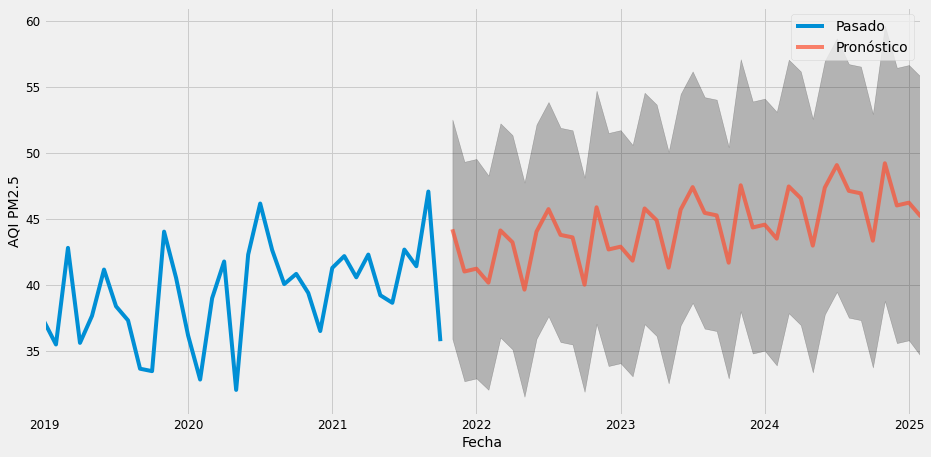

In [125]:
prediccion_futura = results.get_forecast(steps=40)
pred_ic = prediccion_futura.conf_int()
ax = houston_hist_m['2019':].plot(label='Pasado', figsize=(14, 7))
prediccion_futura.predicted_mean.plot(ax=ax, label='Pronóstico', alpha=0.7)

ax.fill_between(pred_ic.index,
                pred_ic.iloc[:, 0],
                pred_ic.iloc[:, 1], color='k',
                alpha=0.25)

ax.set_xlabel('Fecha')
ax.set_ylabel('AQI PM2.5')
plt.legend()
plt.show()

In [133]:
from sklearn.metrics import mean_squared_error as mse 

y_forecasted = pred.predicted_mean
y_truth = houston_hist_m['2019':]

mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 19.03


In [134]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 4.36
